In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
from scipy import signal
from scipy.stats import normaltest
from scipy.stats import anderson

# To check if we reached thermal noise levels after subtracting a poly fit to 50ohm termination data

In [ ]:
# For this, the noise must be Gaussian (Johnson noise)

In [74]:
freq=np.array([]) 
resi=np.array([]) 
with open("residuals.txt", "r") as filestream:
    for line in filestream:
        #print(counter)
        fields=line.split(" ")
        f=float(fields[0])
        freq = np.append(freq,f)
        r=float(fields[1])
        resi = np.append(resi,r)

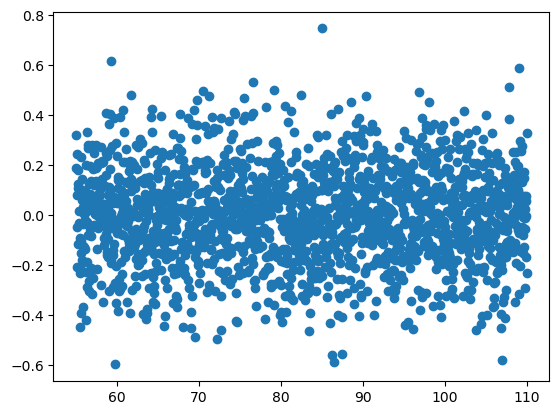

In [12]:
plt.scatter(freq,resi)

(array([  5.,   0.,   3.,  16.,  24.,  30.,  54.,  51.,  81., 109., 133.,
        161., 168., 191., 154., 174., 118.,  96.,  86.,  52.,  37.,  17.,
         25.,   8.,   6.,   1.,   1.,   1.,   0.,   1.]),
 array([-0.59712524, -0.55234231, -0.50755937, -0.46277644, -0.41799351,
        -0.37321058, -0.32842765, -0.28364471, -0.23886178, -0.19407885,
        -0.14929592, -0.10451298, -0.05973005, -0.01494712,  0.02983581,
         0.07461875,  0.11940168,  0.16418461,  0.20896754,  0.25375048,
         0.29853341,  0.34331634,  0.38809927,  0.43288221,  0.47766514,
         0.52244807,  0.567231  ,  0.61201394,  0.65679687,  0.7015798 ,
         0.74636273]),
 <BarContainer object of 30 artists>)

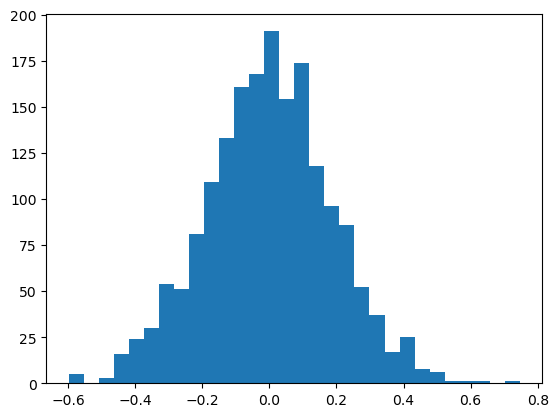

In [75]:
plt.hist(resi,bins=30)

# With sinusoidal noise

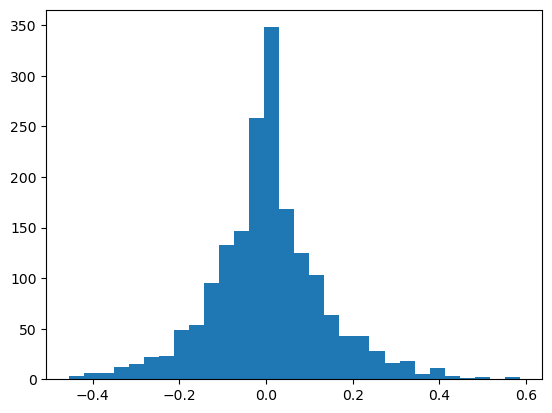

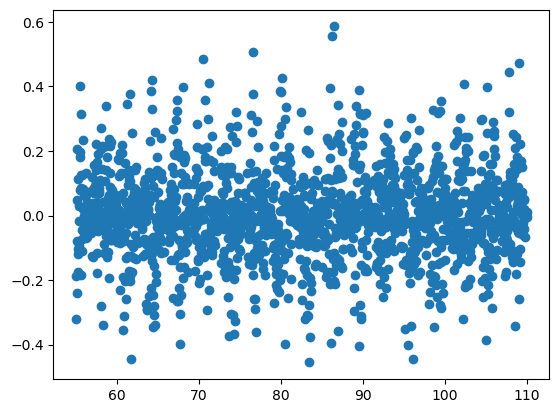

ShapiroResult(statistic=0.9739107489585876, pvalue=1.360052927419587e-17)

In [41]:
# #print(np.sin(freq))
# resi1=resi*np.sin(freq)
# plt.hist(resi1,bins=30)
# plt.show()
# plt.scatter(freq,resi1)
# plt.show()
# shapiro(resi1)

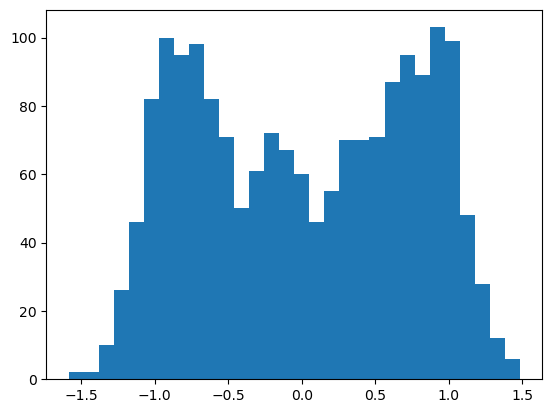

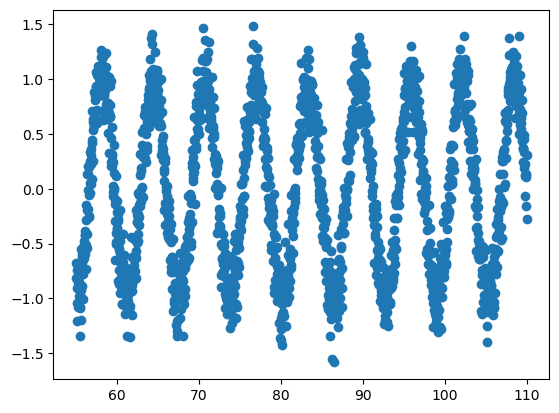

ShapiroResult(statistic=0.9450321197509766, pvalue=2.171872122731859e-25)

In [43]:
#print(np.sin(freq))
resi2=resi+np.sin(freq)
plt.hist(resi2,bins=30)
plt.show()
plt.scatter(freq,resi2)
plt.show()
shapiro(resi2)

# Add RFI at spot freq

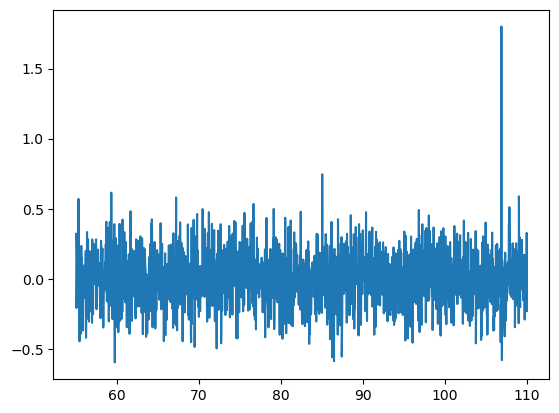

ShapiroResult(statistic=0.9801627397537231, pvalue=4.1222654087978705e-15)

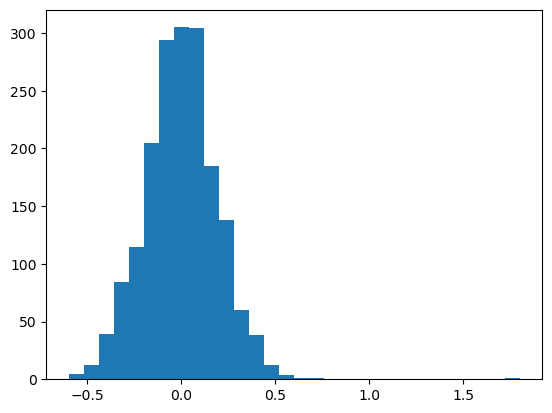

In [65]:
imp1 = signal.unit_impulse(len(freq),10)
imp2 = signal.unit_impulse(len(freq),400)
imp3 = signal.unit_impulse(len(freq),1700)
resi3=resi+0.6*imp1+0.6*imp2+2*imp3
# plt.hist(resi1,bins=30)
plt.plot(freq,resi3)
plt.show()
#plt.plot(freq,resi)
#plt.show()
plt.hist(resi3,bins=30)
shapiro(resi3)

In [13]:
#Normality means that a particular sample has been generated from a Gaussian distribution.
#Normal distributions have a beautiful concept called the 68–95–99.7 rule, which perfectly fits into the normal distribution. 
#Thanks to this, we know how much of the data lies in the range of first, second, and third standard deviation from the mean. 

# Q-Q (quantile-quantile) plots

In [16]:
#If the two distributions that we are comparing are exactly equal, then the points on the Q-Q plot will perfectly lie on a straight line y = x.
#Q-Q plots are also used to find the skewness (a measure of asymmetry) of a distribution.

#When we plot theoretical quantiles on the x-axis and the sample quantiles whose distribution we want to know on the y-axis,
#then we see a very peculiar shape of a normally distributed Q-Q plot for skewness. 
#If the bottom end of the Q-Q plot deviates from the straight line but the upper end does not, then we can clearly say that the distribution has a longer tail to its left. It is left-skewed, also called negatively skewed. 
#When we see the upper end of the Q-Q plot deviate from a straight line while the lower follows one, then the curve has a longer tail to its right and it is right-skewed, also called positively skewed.


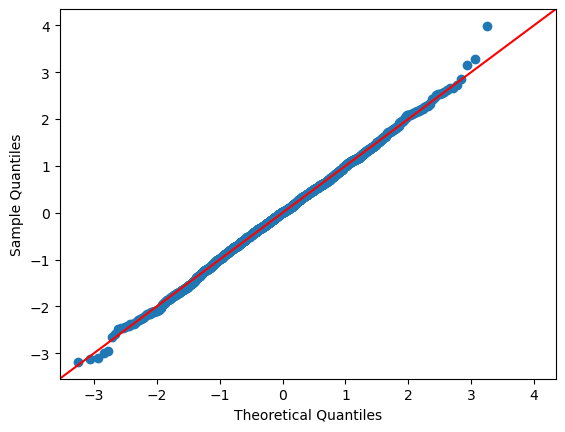

In [25]:
sm.qqplot(resi, fit=True,line ='45') 
py.show()

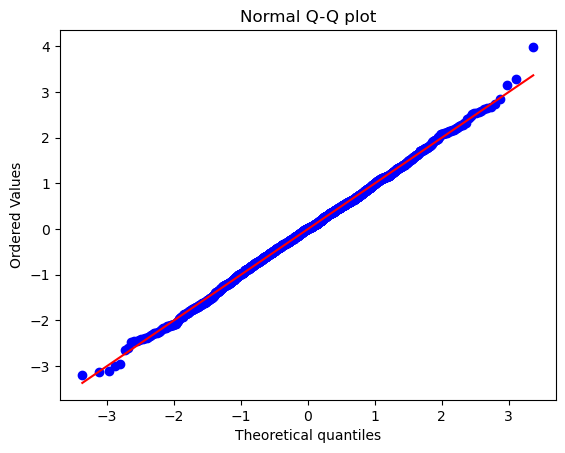

In [21]:
z = (resi-np.mean(resi))/np.std(resi)
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Shapiro-Wilk test

In [ ]:
#The Shapiro-Wilk test is a hypothesis test that is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution. If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution.
# Higher the p-value, the better
#Python, we see that a sample size larger than 5,000 will give us an approximate calculation for the p-value.
# Doesn't work well for large data sets.
#The p-value is lower than 5 percent, so we can reject the null hypothesis of the normality of the data set.

In [76]:
stat, p = shapiro(resi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.999, p=0.527
Sample looks Gaussian (fail to reject H0)


In [ ]:
# Large p value doesn't imply distribution is normal; it says the distribution is just not significantly different from normal dist

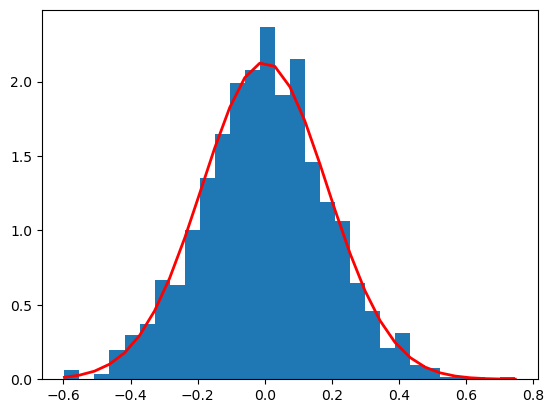

In [78]:
mu=np.mean(resi)
sigma=np.std(resi)
s = np.random.normal(mu, sigma, len(resi))
count, bins, ignored = plt.hist(resi, 30, density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')

# D'Agostino and Pearson's Test

In [68]:
# D'Agostino and Pearson's Test
# normality test
stat, p = normaltest(resi)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.850, p=0.654
Sample looks Gaussian (fail to reject H0)


# Anderson-Darling Test

In [70]:
# Anderson-Darling Test
# normality test
result = anderson(resi)
print('Statistic: %.3f' % result.statistic)
p = 0
# interpret results
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))


Statistic: 0.419
15.000: 0.575, data looks normal (fail to reject H0)
10.000: 0.655, data looks normal (fail to reject H0)
5.000: 0.785, data looks normal (fail to reject H0)
2.500: 0.916, data looks normal (fail to reject H0)
1.000: 1.090, data looks normal (fail to reject H0)


In [ ]:
#Critical values are basically range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value.
#So Anderson-Darling Test return critical values for different significance level instead of single p-value. 

# Kolmogorov-Smirnov test

In [79]:
stats.kstest(resi, s)

KstestResult(statistic=0.016638935108153077, pvalue=0.9642891044503938, statistic_location=-0.06733949238661709, statistic_sign=-1)